Processing embedding dimension: 5
Mean Pairwise Distance: 0.09679807533125462
Optimal Transport Cost: 0.08616112913573316
--------------------------------------------------
Processing embedding dimension: 10
Mean Pairwise Distance: 0.0962686562214611
Optimal Transport Cost: 0.08565191758453983
--------------------------------------------------
Processing embedding dimension: 15
Mean Pairwise Distance: 0.09467674391853848
Optimal Transport Cost: 0.08581250402575885
--------------------------------------------------


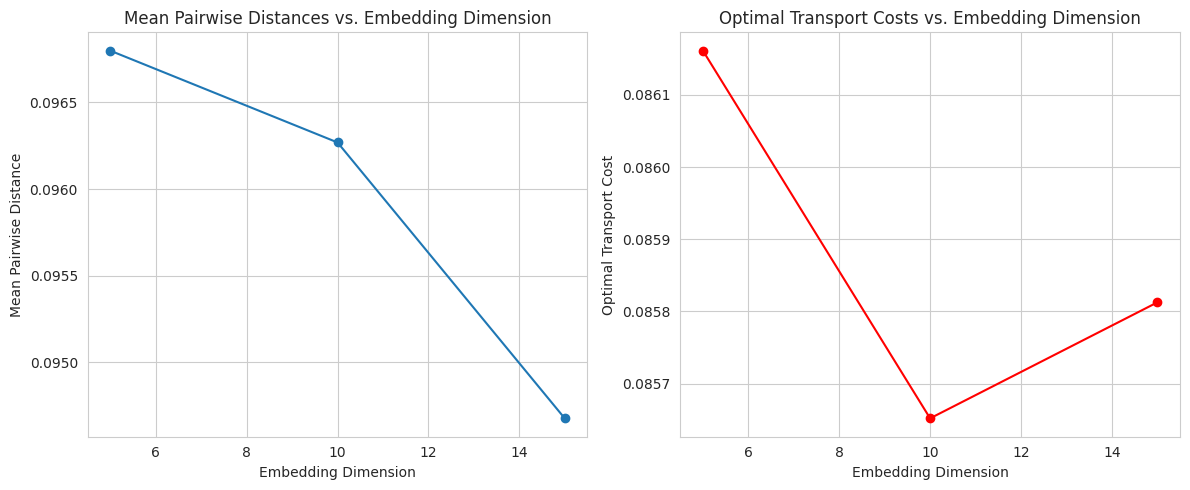

The best embedding dimension based on mean pairwise distance is: 15
The best embedding dimension based on OT cost is: 10


In [1]:
import numpy as np
from scipy.spatial import procrustes
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import ot  # POT library for Optimal Transport
import matplotlib.pyplot as plt

# Ensure that the POT library is installed
# You can install it via: pip install POT

# Define your list of embedding dimensions
embedding_dimensions = [5, 10, 15]  # Example dimensions from n to m

# Initialize lists to store matching metrics for each embedding space
mean_pairwise_distances = []
ot_costs = []

# Number of samples in your datasets
n_samples = 100  # Adjust as needed

# Loop over each embedding dimension
for dim in embedding_dimensions:
    print(f"Processing embedding dimension: {dim}")
    
    # Step 1: Generate random embeddings for ds1 and ds2
    # In practice, you would load your actual embeddings here
    np.random.seed(42)  # For reproducibility
    ds1_embeddings = np.random.rand(n_samples, dim)
    ds2_embeddings = np.random.rand(n_samples, dim)
    
    # Standardize embeddings
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    ds1_embeddings = scaler1.fit_transform(ds1_embeddings)
    ds2_embeddings = scaler2.fit_transform(ds2_embeddings)
    
    # Step 2: Align Dimensions using Procrustes Analysis
    mtx1, mtx2, disparity = procrustes(ds1_embeddings, ds2_embeddings)
    # mtx1 and mtx2 are the aligned embeddings
    
    # Alternative: Align Dimensions using CCA
    # cca = CCA(n_components=dim)
    # ds1_embeddings_cca, ds2_embeddings_cca = cca.fit_transform(ds1_embeddings, ds2_embeddings)
    # Use ds1_embeddings_cca and ds2_embeddings_cca for further calculations
    
    # Step 3: Compute Pairwise Distances between corresponding samples
    pairwise_distances = np.linalg.norm(mtx1 - mtx2, axis=1)
    mean_distance = np.mean(pairwise_distances)
    mean_pairwise_distances.append(mean_distance)
    print(f"Mean Pairwise Distance: {mean_distance}")
    
    # Step 4: Compute Optimal Transport Cost
    # Create cost matrix between all samples (optional, since datasets are coupled)
    cost_matrix = cdist(mtx1, mtx2, metric='euclidean')
    
    # Since datasets are coupled, create uniform distributions
    a = np.ones(n_samples) / n_samples
    b = np.ones(n_samples) / n_samples
    
    # Compute OT cost using Sinkhorn algorithm
    lambda_reg = 1e-3  # Entropic regularization parameter
    ot_cost = ot.sinkhorn2(a, b, cost_matrix, lambda_reg)
    ot_costs.append(ot_cost)
    print(f"Optimal Transport Cost: {ot_cost}")
    print("-" * 50)

# Step 5: Compare Embedding Spaces
# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(embedding_dimensions, mean_pairwise_distances, marker='o')
plt.title('Mean Pairwise Distances vs. Embedding Dimension')
plt.xlabel('Embedding Dimension')
plt.ylabel('Mean Pairwise Distance')

plt.subplot(1, 2, 2)
plt.plot(embedding_dimensions, ot_costs, marker='o', color='red')
plt.title('Optimal Transport Costs vs. Embedding Dimension')
plt.xlabel('Embedding Dimension')
plt.ylabel('Optimal Transport Cost')

plt.tight_layout()
plt.show()

# Identify the best embedding space
best_dimension_index = np.argmin(mean_pairwise_distances)
best_embedding_dimension = embedding_dimensions[best_dimension_index]
print(f"The best embedding dimension based on mean pairwise distance is: {best_embedding_dimension}")

best_ot_index = np.argmin(ot_costs)
best_ot_dimension = embedding_dimensions[best_ot_index]
print(f"The best embedding dimension based on OT cost is: {best_ot_dimension}")
